## Glass Identification
### Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass

Dataset Link-
•https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [170]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")

In [171]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [172]:
# set attribute columns
df =pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv",names =['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

In [173]:
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [174]:
df.head(15)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [175]:
df.tail(15)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
199,200,1.51609,15.01,0.0,2.51,73.05,0.05,8.83,0.53,0.0,7
200,201,1.51508,15.15,0.0,2.25,73.50,0.00,8.34,0.63,0.0,7
201,202,1.51653,11.95,0.0,1.19,75.18,2.70,8.93,0.00,0.0,7
202,203,1.51514,14.85,0.0,2.42,73.72,0.00,8.39,0.56,0.0,7
203,204,1.51658,14.80,0.0,1.99,73.11,0.00,8.28,1.71,0.0,7
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [177]:
df.isnull().sum()

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### there is no null in dataset so no need to fill any value

In [178]:
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [179]:
df.nunique()

ID      214
RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [180]:
#we do not need id  column for model 
df = df.drop(columns=['ID'])

In [181]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

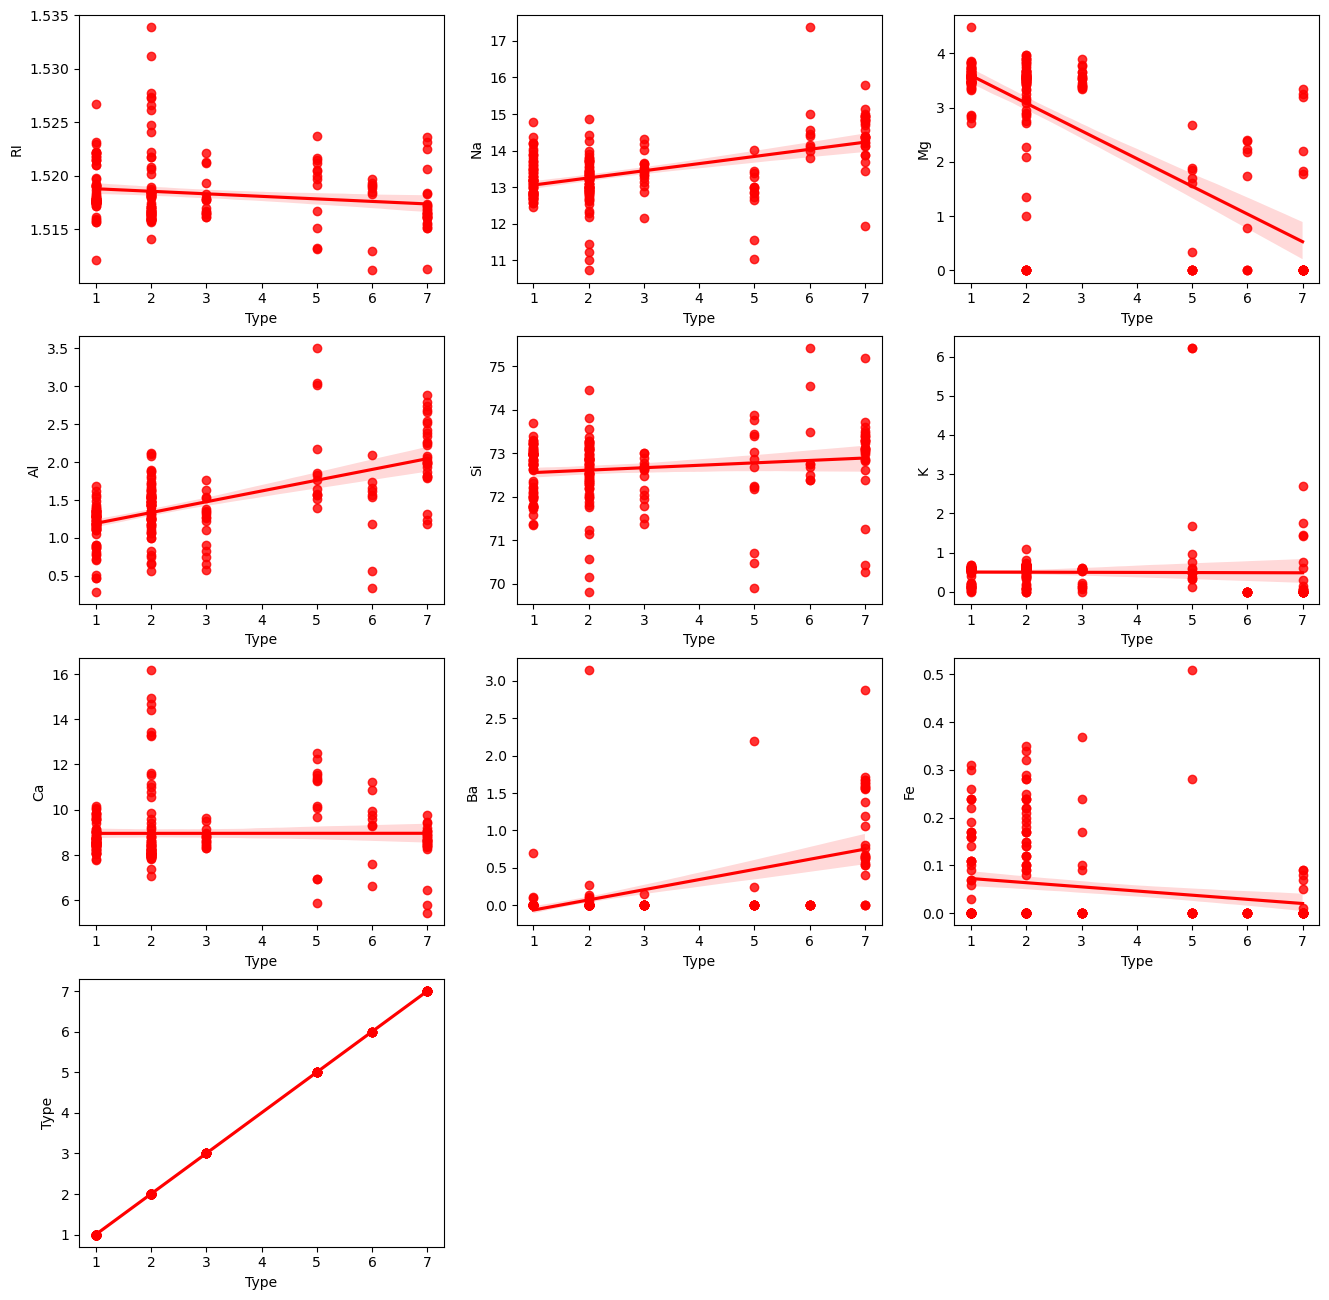

In [182]:
#checking relationship with targetvariable
plt.figure(figsize=(16,16))
p=1
for i in df:
    if p<=11:
        plt.subplot(4,3,p)
        sns.regplot(x='Type',y=i,data=df,color='r')
        #sns.lmplot(data=df1,x='Happiness Score',y=i,palette='colorblind')
        plt.xlabel("Type")
        plt.ylabel(i)
    p+=1
plt.show()

i can see Mg,AI,Fe,Ba coloum has visible effect on type other column like RI,Na,Si,K,Ca has not much effect on Type

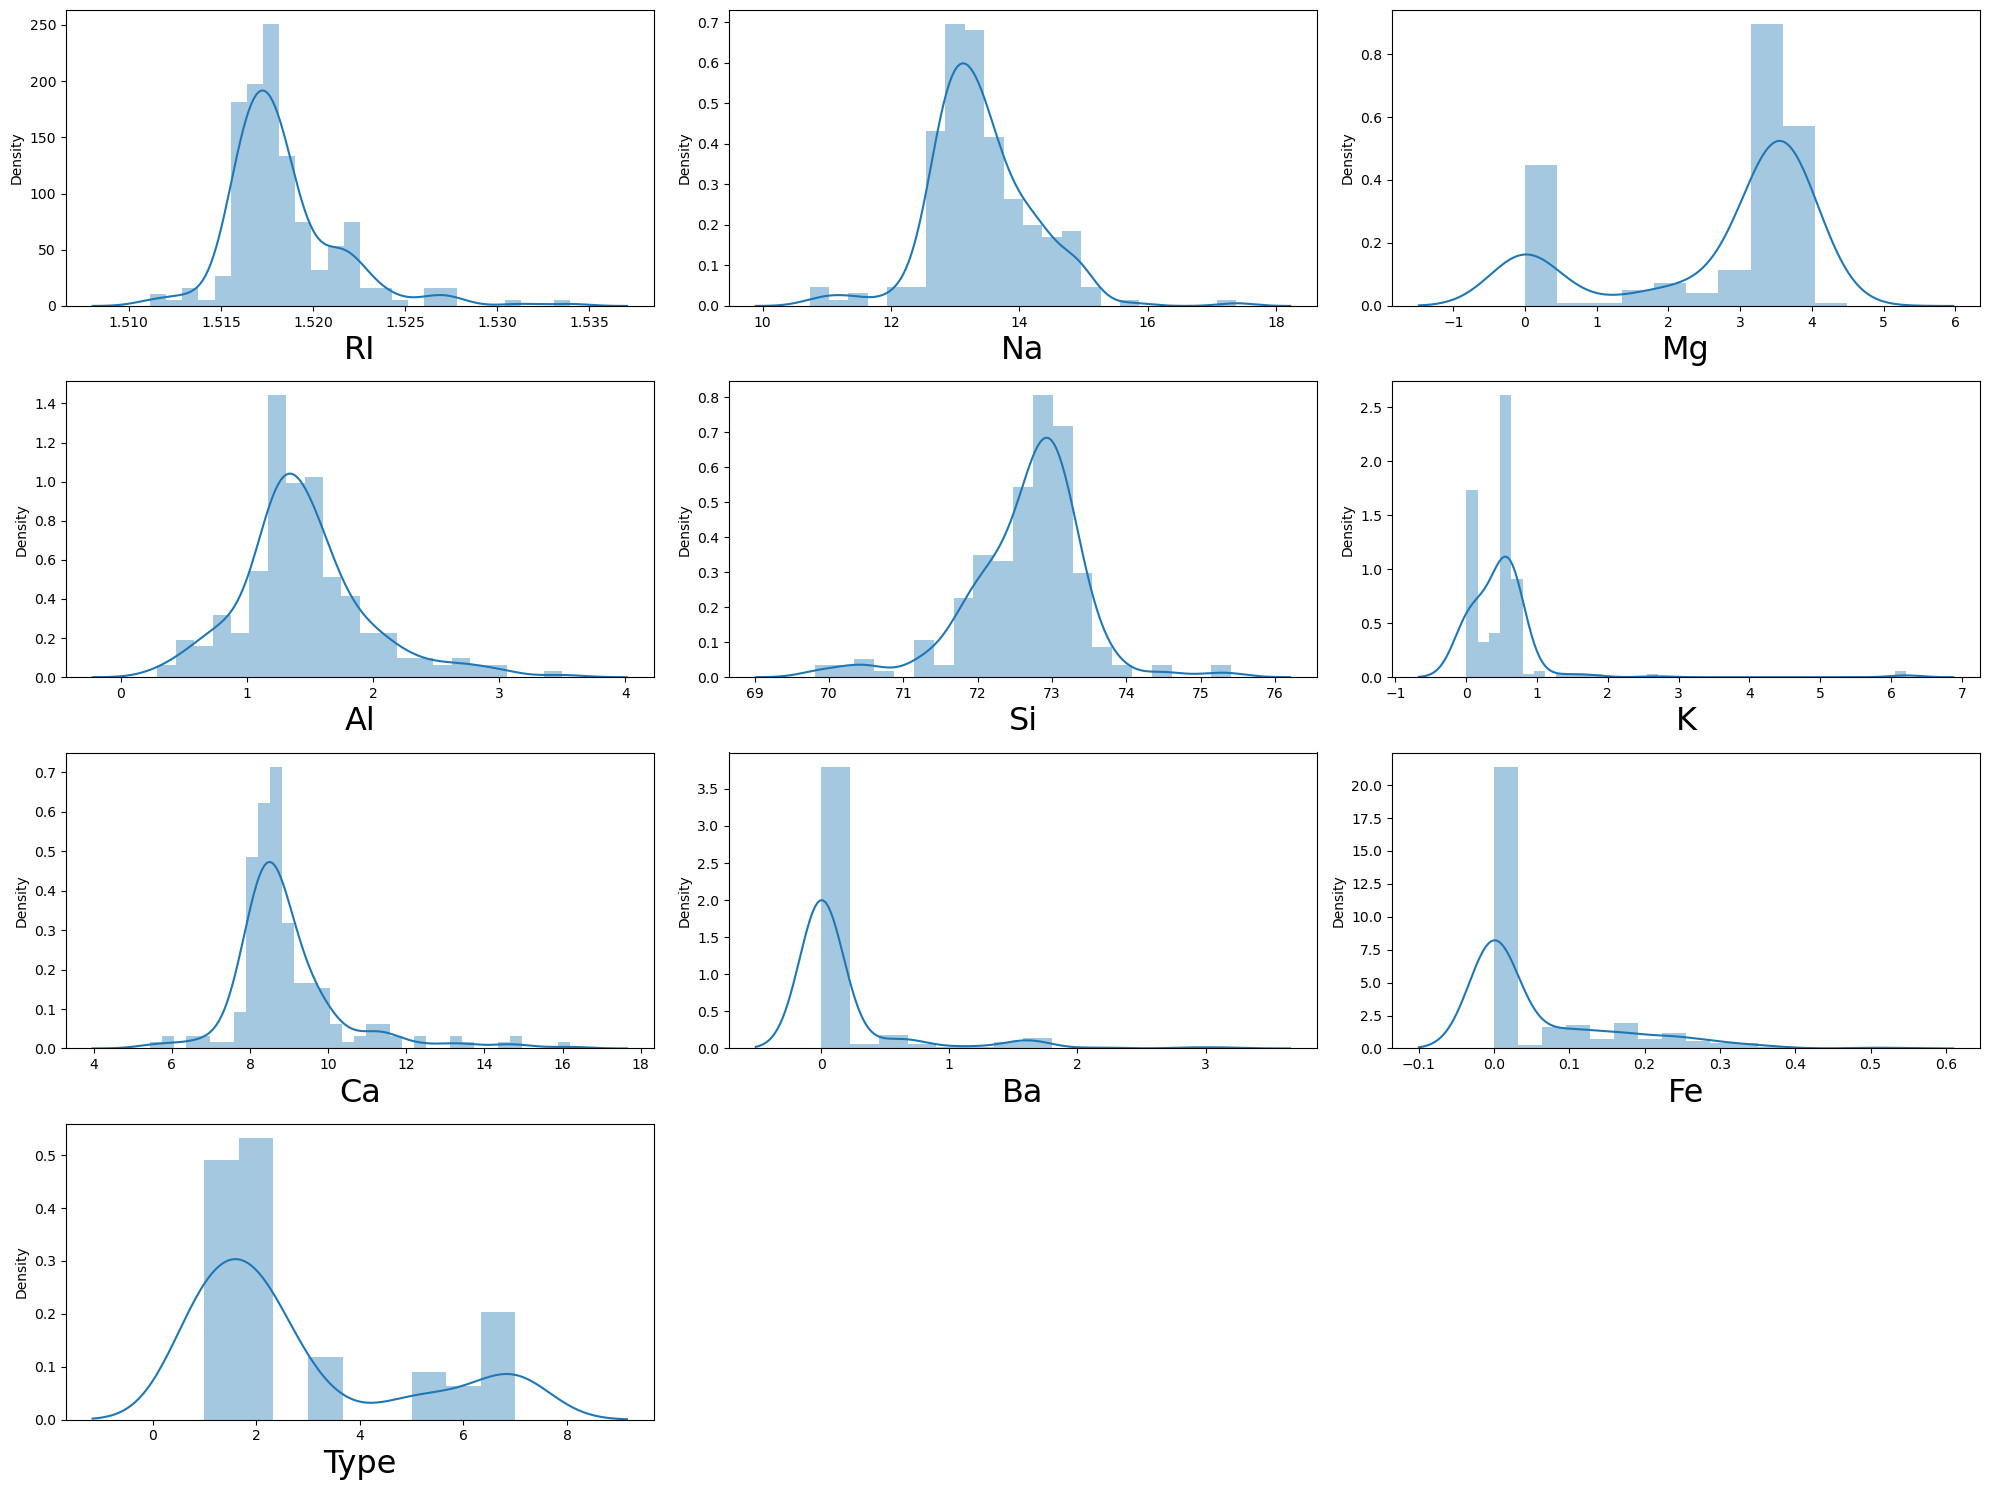

In [183]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=23)
    plotnumber+=1
plt.tight_layout()

we can see some see some column have skewness

In [184]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

RI,Mg,Al,Si,K,Ca,Ba,Fe has skewness

lets check outliers

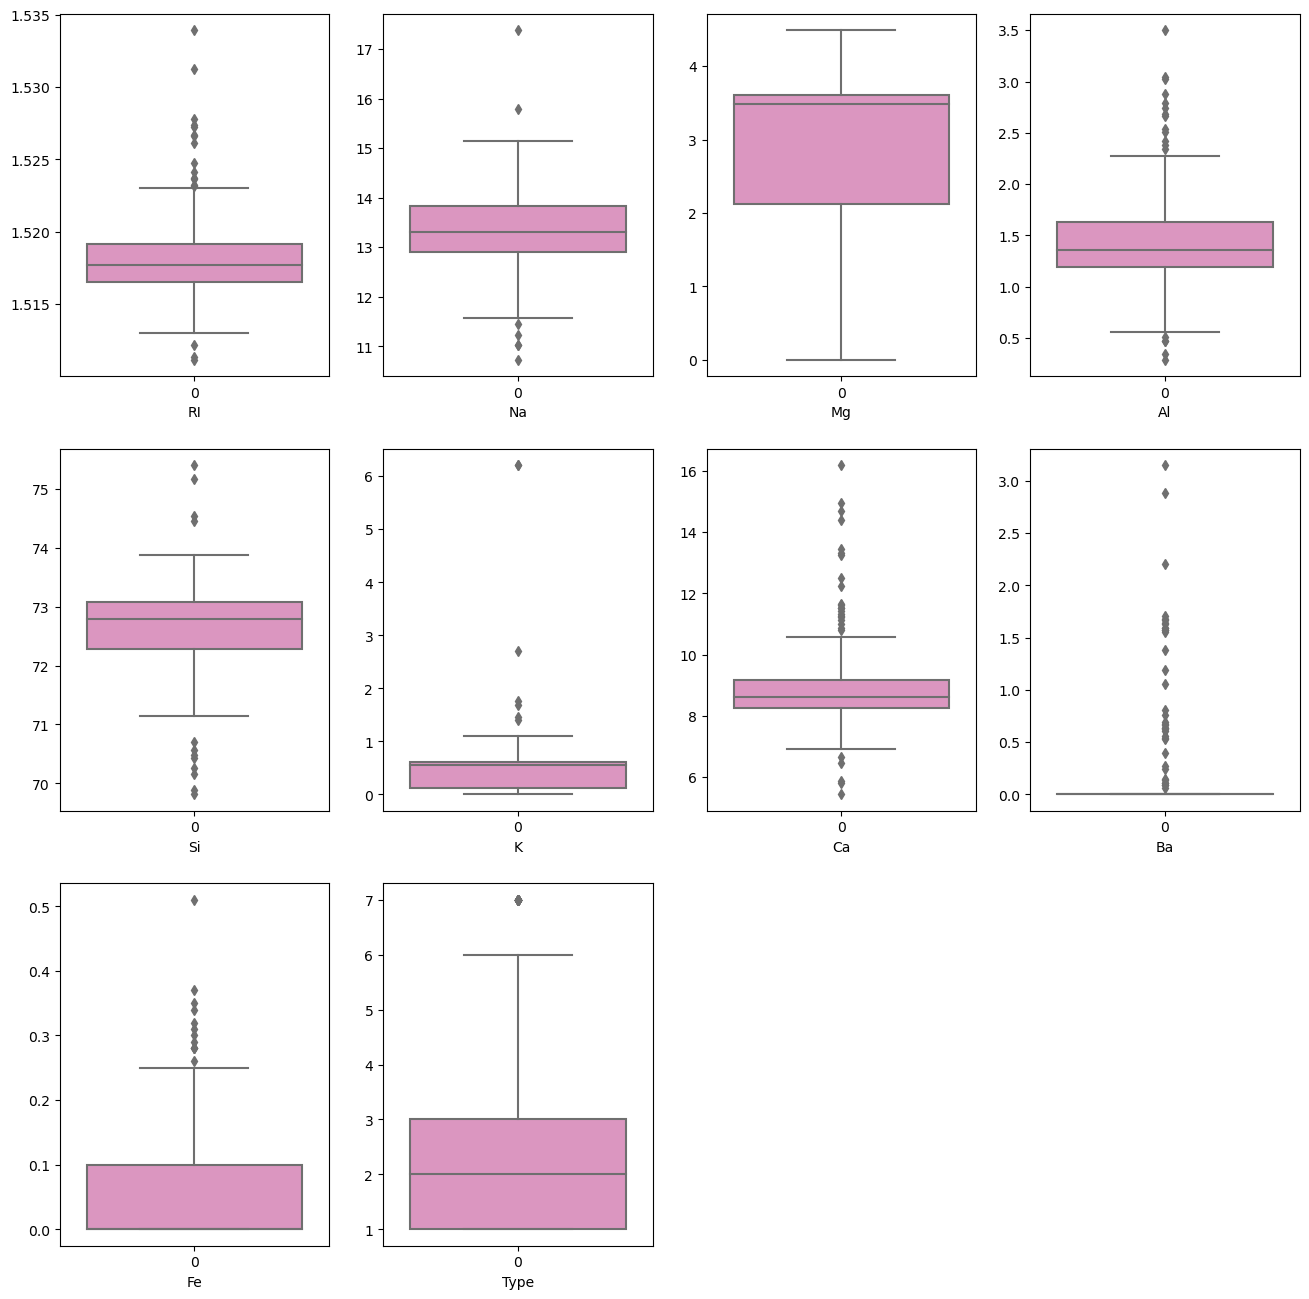

In [185]:
plt.figure(figsize=(16,16))
n=1
for i in df:
    if n<=12:
        plt.subplot(3,4,n)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

In [186]:
#i am removing column ca and K because it hase no relation with target variable
df = df.drop(['Ca', 'K'], axis=1)

In [187]:
df

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,1.57,0.0,7


removing skewness

In [189]:
df['Mg'] = np.cbrt(df['Mg'])
df['RI'] = np.cbrt(df['RI'])
df['Al'] = np.cbrt(df['Al'])
df['Ba'] = np.cbrt(df['Ba'])
df['Fe'] = np.cbrt(df['Fe'])

In [190]:
df.skew()# i try to remove skewness

RI      1.617049
Na      0.454181
Mg     -1.440196
Al     -0.204132
Si     -0.730447
Ba      2.073007
Fe      0.894683
Type    1.114915
dtype: float64

In [191]:
df.corr()

,RI,Na,Mg,Al,Si,Ba,Fe,Type
RI,1.000000,-0.191810,-0.113648,-0.418036,-0.541953,-0.092651,0.132621,-0.164422
Na,-0.191810,1.000000,-0.277849,0.077449,-0.069809,0.418626,-0.196921,0.502898
Mg,-0.113648,-0.277849,1.000000,-0.375748,-0.171665,-0.548170,0.094472,-0.701285
Al,-0.418036,0.077449,-0.375748,1.000000,0.030268,0.509187,-0.054623,0.540250
Si,-0.541953,-0.069809,-0.171665,0.030268,1.000000,-0.005974,-0.078194,0.151565
Ba,-0.092651,0.418626,-0.548170,0.509187,-0.005974,1.000000,-0.035721,0.663262
Fe,0.132621,-0.196921,0.094472,-0.054623,-0.078194,-0.035721,1.000000,-0.204767
Type,-0.164422,0.502898,-0.701285,0.540250,0.151565,0.663262,-0.204767,1.000000


we can say type hase more corelation with Na,Ba, Mg,Al column

In [192]:
#removing outliers from three columns
from scipy.stats import zscore
out_features=df[['Na','Fe','RI','Ba']]
z=np.abs(zscore(out_features))
z

,Na,Fe,RI,Ba
0,0.284953,0.679381,0.873958,0.439469
1,0.591817,0.679381,0.248977,0.439469
2,0.149933,0.679381,0.721771,0.439469
3,0.242853,0.679381,0.232451,0.439469
4,0.169205,0.679381,0.311778,0.439469
...,...,...,...,...
209,0.898681,0.679381,0.705234,2.317817
210,1.856097,0.679381,0.500215,2.716835
211,1.168721,0.679381,0.755138,2.749579
212,1.193270,0.679381,0.612638,2.703545


In [193]:
df = df[(z<3).all(axis=1)]
df

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.150034,13.64,1.649740,1.032280,71.78,0.000000,0.0,1
1,1.149176,13.89,1.532619,1.107932,72.73,0.000000,0.0,1
2,1.148815,13.53,1.525490,1.154800,72.99,0.000000,0.0,1
3,1.149189,13.21,1.545286,1.088587,72.61,0.000000,0.0,1
4,1.149129,13.27,1.535452,1.074337,73.08,0.000000,0.0,1
...,...,...,...,...,...,...,...,...
209,1.148828,14.14,0.000000,1.422757,72.61,1.019613,0.0,7
210,1.148985,14.92,0.000000,1.257818,73.06,1.167165,0.0,7
211,1.149943,14.36,0.000000,1.264107,73.42,1.179274,0.0,7
212,1.148899,14.38,0.000000,1.247194,73.61,1.162251,0.0,7


In [198]:
x = df.drop('Type',axis=1)
y = df['Type']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (208, 7)
label Dimension (208,)


In [199]:
y.value_counts()

2    73
1    70
7    28
3    17
5    12
6     8
Name: Type, dtype: int64

In [200]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.drop(columns=['Type'])
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,Ba,Fe
0,1.069987,0.317403,0.738701,-0.671135,-1.311346,-0.428032,-0.678906
1,-0.239948,0.652258,0.536395,-0.064149,0.075000,-0.428032,-0.678906
2,-0.791475,0.170067,0.524082,0.311899,0.454421,-0.428032,-0.678906
3,-0.220670,-0.258546,0.558275,-0.219358,-0.100117,-0.428032,-0.678906
4,-0.313207,-0.178181,0.541289,-0.333693,0.585759,-0.428032,-0.678906
...,...,...,...,...,...,...,...
203,-0.772185,0.987112,-2.110939,2.461835,-0.100117,2.539693,-0.678906
204,-0.533024,2.031859,-2.110939,1.138452,0.556573,2.969166,-0.678906
205,0.931380,1.281784,-2.110939,1.188913,1.081926,3.004409,-0.678906
206,-0.664169,1.308573,-2.110939,1.053211,1.359195,2.954861,-0.678906


In [201]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS =0
for i in range(1,110):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)# training model
    pred = RFR.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i# setting best random state for higher accuracy
print('Best accuracy is',maxAccu,'at random_state',maxRS)

Best accuracy is 0.873015873015873 at random_state 38


In [202]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
# creating one function for various classification model
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=78)
    model.fit(x_train,y_train)# Training the model
    pred = model.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    print("accuracy score",acc)
    print("classification_report",classification_report(y_test,pred))
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [204]:
model=LogisticRegression(random_state=38)
classify(model,x,y)

accuracy score 0.5476190476190477
classification_report               precision    recall  f1-score   support

           1       0.73      0.42      0.53        19
           2       0.40      0.67      0.50        12
           3       0.00      0.00      0.00         1
           5       1.00      0.67      0.80         3
           6       0.33      0.50      0.40         2
           7       0.80      0.80      0.80         5

    accuracy                           0.55        42
   macro avg       0.54      0.51      0.51        42
weighted avg       0.63      0.55      0.56        42

Cross Validation Score: 0.6156794425087109

Accuracy Score - Cross Validation Score is -0.0680603948896632


In [205]:
# Support Vector Classifier
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=78)
classify(model, x, y)

accuracy score 0.6904761904761905
classification_report               precision    recall  f1-score   support

           1       0.76      0.68      0.72        19
           2       0.53      0.75      0.62        12
           3       0.00      0.00      0.00         1
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         2
           7       1.00      0.80      0.89         5

    accuracy                           0.69        42
   macro avg       0.51      0.54      0.51        42
weighted avg       0.67      0.69      0.67        42

Cross Validation Score: 0.6252032520325204

Accuracy Score - Cross Validation Score is 0.0652729384436701


In [206]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model,x,y)

accuracy score 0.8095238095238095
classification_report               precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
           2       0.67      1.00      0.80        12
           3       0.00      0.00      0.00         1
           5       0.60      1.00      0.75         3
           6       0.00      0.00      0.00         2
           7       1.00      0.80      0.89         5

    accuracy                           0.81        42
   macro avg       0.54      0.60      0.55        42
weighted avg       0.80      0.81      0.79        42

Cross Validation Score: 0.6824622531939605

Accuracy Score - Cross Validation Score is 0.12706155632984906


In [207]:
#GradientBoostingClassifier
model=GradientBoostingClassifier()
classify(model,x,y)

accuracy score 0.7380952380952381
classification_report               precision    recall  f1-score   support

           1       0.87      0.68      0.76        19
           2       0.62      0.83      0.71        12
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.80      0.80      0.80         5

    accuracy                           0.74        42
   macro avg       0.63      0.64      0.63        42
weighted avg       0.76      0.74      0.74        42

Cross Validation Score: 0.6487804878048781

Accuracy Score - Cross Validation Score is 0.08931475029036007


In [208]:
#bagging
model=BaggingClassifier()
classify(model,x,y)

accuracy score 0.7142857142857143
classification_report               precision    recall  f1-score   support

           1       0.78      0.74      0.76        19
           2       0.57      0.67      0.62        12
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       0.80      0.80      0.80         5

    accuracy                           0.71        42
   macro avg       0.69      0.62      0.64        42
weighted avg       0.73      0.71      0.72        42

Cross Validation Score: 0.672706155632985

Accuracy Score - Cross Validation Score is 0.04157955865272933


In [209]:
#AdaBoostClassifier
model=AdaBoostClassifier()
classify(model,x,y)

accuracy score 0.5714285714285714
classification_report               precision    recall  f1-score   support

           1       0.67      0.53      0.59        19
           2       0.42      0.67      0.52        12
           3       0.00      0.00      0.00         1
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       0.67      0.80      0.73         5

    accuracy                           0.57        42
   macro avg       0.46      0.44      0.44        42
weighted avg       0.57      0.57      0.56        42

Cross Validation Score: 0.3698025551684088

Accuracy Score - Cross Validation Score is 0.20162601626016258


In [210]:
model=RandomForestClassifier(max_depth=15, random_state=41)
classify(model,x,y)

accuracy score 0.7142857142857143
classification_report               precision    recall  f1-score   support

           1       0.86      0.63      0.73        19
           2       0.59      0.83      0.69        12
           3       0.00      0.00      0.00         1
           5       0.75      1.00      0.86         3
           6       0.50      0.50      0.50         2
           7       0.80      0.80      0.80         5

    accuracy                           0.71        42
   macro avg       0.58      0.63      0.60        42
weighted avg       0.73      0.71      0.71        42

Cross Validation Score: 0.7111498257839722

Accuracy Score - Cross Validation Score is 0.003135888501742068


after comparing all classifier i am choosing RandomForestClassifier because has not much
difference between Accuracy Score and Cross Validation Score and also accuracy score is high


In [154]:
from sklearn.model_selection import GridSearchCV

In [230]:
parameters = {'n_estimators':[1, 2, 3, 4, 5],'max_samples': [2.5, 0.1, 0.2, 0.3,4.0],'max_features':[1.0,2.0,3.0,4.0,5.0],'bootstrap':[True,False]}
gscv = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'max_samples': [2.5, 0.1, 0.2, 0.3, 4.0],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [231]:
gscv.best_params_

{'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.2, 'n_estimators': 5}

In [253]:
Final_Model =RandomForestClassifier(max_samples=0.5,n_estimators=5,max_features=1.0,bootstrap=True)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 65.07936507936508


In [248]:
import pickle
filename = 'Glassclassifier.pkl'
pickle.dump(model,open(filename,'wb'))

In [249]:
import pickle
load_model = pickle.load(open('Glassclassifier.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

92.06349206349206


In [250]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
Predicted,1,5,2,2,2,2,1,2,7,1,...,1,2,2,2,3,2,1,2,1,2
original,1,5,2,2,2,2,1,1,7,1,...,7,2,2,2,3,2,1,2,1,2
